Purpose of this notebook: 
* reads and summarizes the outputs from projections and smoothing
* creates LaTeX table for the paper 


In [508]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [248]:
%autoreload 2
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.rcParams['figure.figsize'] = (10, 8)
import pprint

In [216]:
from __future__ import print_function
from astropy.stats import biweight_location
import pandas as pd
import h5py
import sys
sys.path.append("../")
import extract_catalog as ec
import get_DM_centroids as getDM
# import seaborn as sns
import compute_distance as compDist
import plot_cred_int as plotCI
import plot_gal_prop as plotgal
i
import get_KDE

In [217]:
data_path = "../../data/test_results/"

# read in files 

In [218]:
clstNo = 43
date_stamp = '06_17_16'

DM_fhats = \
    h5py.File(data_path +
              "DM_fhat_clst{0}_{1}.h5".format(
            clstNo, date_stamp), 'r')
star_fhats = \
    h5py.File(data_path +
              "stars_fhat_clst{0}_{1}.h5".format(
            clstNo, date_stamp), 'r')
main_FOF_h5 = h5py.File(
        "../../data/" +
        "Illustris-1_fof_subhalo_myCompleteHaloCatalog_00135" +
        ".hdf5", "r")

In [219]:
star_no_dens_fhat = \
    h5py.File("../../data/test_results/" + 
              "stars_fhat_clst_no_density_43_06_25_16.h5")

# figure out how many projections we did 

In [264]:
clstNo_list = sorted([int(no) for no in star_fhats.keys()])

In [265]:
star_paths = compDist.retrieve_cluster_path(star_fhats)

the list of `DM_paths` are 

The projections do not mean a thing except for debugging purposes, 
only the `clstNo` is a valid identifier 

In [222]:
split_path = star_paths[0].split('/')

In [223]:
fixed_path = '/'.join(split_path[1:4])

In [224]:
path = '0' + '/' + fixed_path

In [225]:
projections = star_fhats[str(clstNo_list[0]) + '/' + fixed_path].keys()

## columns in my uber dataframe (projection independent part)
| ClstNo | $m_{200c}$ | richness | relaxedness0| relaxedness1 |  


## projection dependent part 
| ClstNo | kernel_width | $\Delta s_{BCG}$ | $\Delta s_{KDE}$ | $\zeta$ | $\Delta s_{SA}$ | $\Delta s_{C}$ |  projection | total_peaks_dens | 

ClstNo is retained to match and join the two sets of `df`

# gather the projection dependent part of the `uber_df`

In [234]:
summary_stat_keys = ['BCG', 'centroid', "shrink_cent"]

The Uber DF contains offsets from between the galaxy KDE peak and the corresponding DM peaks

In [235]:
uber_df1 = pd.read_hdf("../../data/uber_df_06_17_16.h5", 'df')
uber_df2 = pd.read_hdf("../../data/uber_df_06_21_16.h5", 'df')
no_dens_df = pd.read_hdf('../../data/no_dens_dist_df.h5', 'df')
uber_df = pd.concat([uber_df1, uber_df2])

# make plots

In [497]:
dom_peak_gpby = uber_df.groupby(['peak_id', 'bin_width'])
dom_peak_df_25 = dom_peak_gpby.get_group((0, 25.0))
dom_peak_df_25.index = range(dom_peak_df_25.shape[0])
sum_stat_dom_peak_df = pd.concat([dom_peak_df_25, no_dens_df], 
                                 axis=1)
sum_stat_dom_peak_df.columns = \
    [u'BCG', u'Delta_x_BCG', u'Delta_x_centroid', 
     u'Delta_x_shrink_cent', u'Delta_y_BCG', 
     u'Delta_y_centroid', u'Delta_y_shrink_cent', 
     u'centroid', u'shrink_cent', u'peak_id', 
     u'KDE', u'Delta_x_KDE', u'Delta_y_KDE', 
     u'total_peaks_dens', 
     u'bin_width', 
     u'Delta_x_no_peak', 
     u'Delta_y_no_peak', 
     u'no_peak']

In [473]:
percentiles = {68L: int(.68 * sum_stat_dom_peak_df.shape[0]), 
               95L: int(.95 * sum_stat_dom_peak_df.shape[0]), 
               99L: int(.99 * sum_stat_dom_peak_df.shape[0])}

In [505]:
def compute_mag_p_value_intervals(df, stat_key, percentiles):
    sorted_stat = np.argsort(df[stat_key])
    return {k: df[stat_key][sorted_stat[v]]
               for k, v in percentiles.iteritems()}

In [503]:

p_value_intervals = {key: compute_p_value_intervals(
                          sum_stat_dom_peak_df, key, percentiles)
                     for key in stat_key}

In [515]:
oneD_sum_stat_p_value_intervals = [pd.DataFrame(df, index=[key]) for key, df in 
            p_value_intervals.iteritems()]

In [516]:
pd.concat(oneD_sum_stat_p_value_intervals)

,68,95,99
KDE,40.225566,107.894565,152.025066
BCG,4.914816,311.877084,1661.338151
no_peak,125.451396,457.594718,904.985188
shrink_cent,119.151872,376.907396,864.545211


In [395]:
stat_key = {'BCG': r"$\Delta s_{\rm BCG}$", 
            'shrink_cent': r"$\Delta s_{\rm shrink}$'", 
            'KDE': r"$\Delta s_{\rm KDE}$'",
            'no_peak': r"$\Delta s_{\rm num KDE}$"
           }

In [405]:
import statsmodels

In [406]:
from statsmodels.nonparametric.kernel_density import KDEMultivariate

In [433]:
data = np.array([
        sum_stat_dom_peak_df['Delta_x_' + key], 
        sum_stat_dom_peak_df['Delta_y_' + key]]).transpose()

In [434]:
def 
dens = KDEMultivariate(data, var_type='cc', bw='normal_reference')

In [461]:
coords = np.array([[i, j] for i in np.arange(-500, 500, 5) 
          for j in np.arange(-400, 400, 5)])

In [462]:
pdf = dens.pdf(coords)

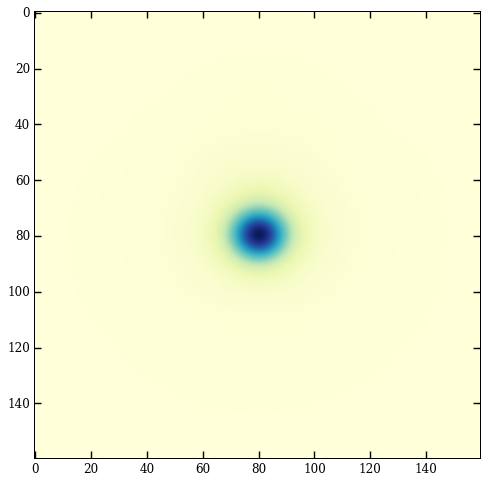

In [469]:
# plt.imshow(pdf.reshape(160, 160))

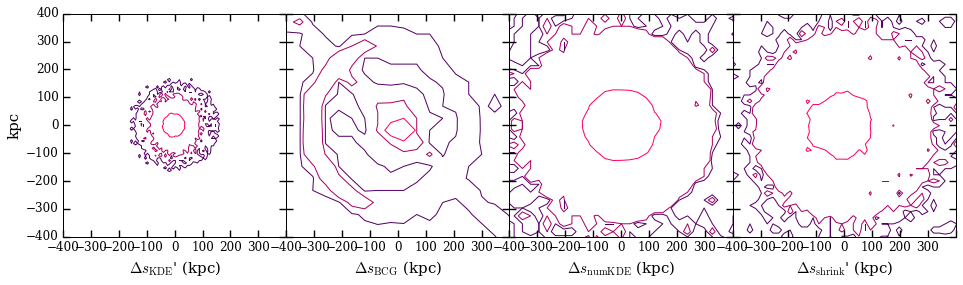

In [526]:

fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True, 
                         figsize=(16, 4))
fig.subplots_adjust(wspace=0.)

twoD_stat_lvls = {}
for i, key in enumerate(stat_key) :
    
    dens, xedges, yedges = np.histogram2d(
        sum_stat_dom_peak_df['Delta_x_' + key], 
        sum_stat_dom_peak_df['Delta_y_' + key], bins=100)
    
    x_spacing = (xedges[1] - xedges[0]) / 2. + xedges[:-1]
    y_spacing = (yedges[1] - yedges[0]) / 2. + yedges[:-1]
    
    twoD_stat_lvls[key] = plotgal.plot_cf_contour(dens,
        x_spacing, y_spacing, ax=axes[i], lvls=[68., 95., 99.]
    )
    axes[i].set_xlim(-400, 400)
    axes[i].set_ylim(-400, 400)
    axes[i].set_xlabel(stat_key[key] + ' (kpc)')

axes[0].set_ylabel('kpc')

_ = plt.setp([a.get_xticklabels()[-1] 
         for a in axes], visible=False)

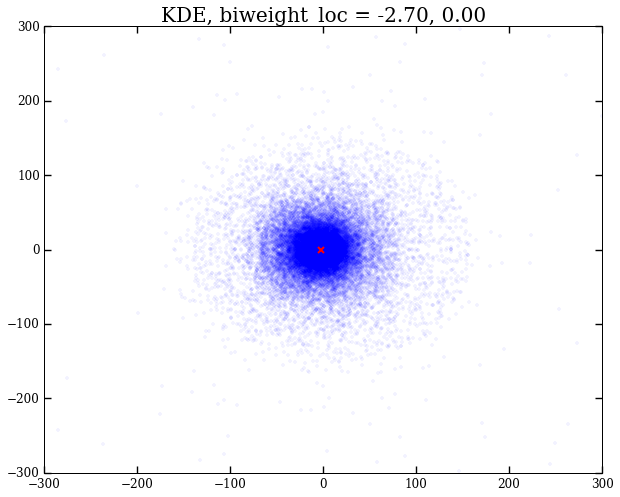

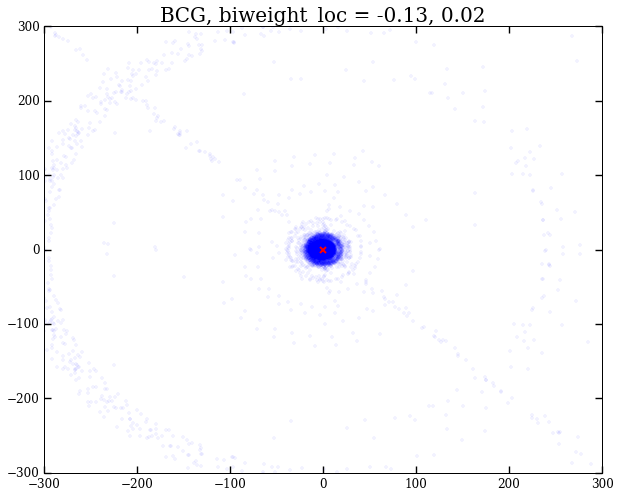

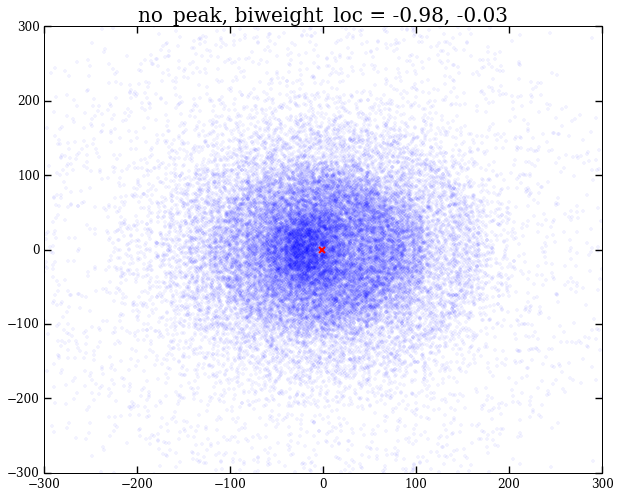

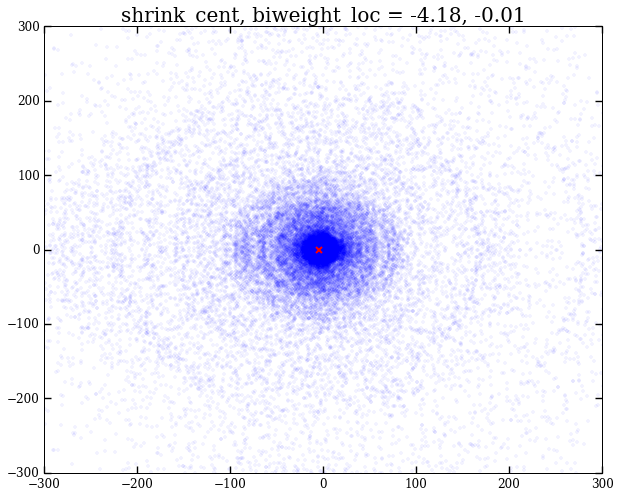

In [402]:


## This is for DOMINANT PEAKS only
for i, key in enumerate(stat_key) :
    
    plt.plot(
        np.array(sum_stat_dom_peak_df['Delta_x_' + key]), 
        np.array(sum_stat_dom_peak_df['Delta_y_' + key]),
        'b.', alpha=0.05
        )
    biweight_loc = (
        biweight_location(sum_stat_dom_peak_df['Delta_x_' + key]), 
        biweight_location(sum_stat_dom_peak_df['Delta_y_' + key]))
    plt.plot(biweight_loc[0], biweight_loc[1],
             'rx', mew=2.)
    
    plt.xlim(-300, 300)
    plt.ylim(-300, 300)
    plt.title(key + ', biweight_loc = {0:.2f}, {1:.2f}'.format(
            *biweight_loc))
    
    plt.show()
    plt.clf()

# make CI plots 

In [ ]:
gridspec.GridSpec()

IndexError: index out of range

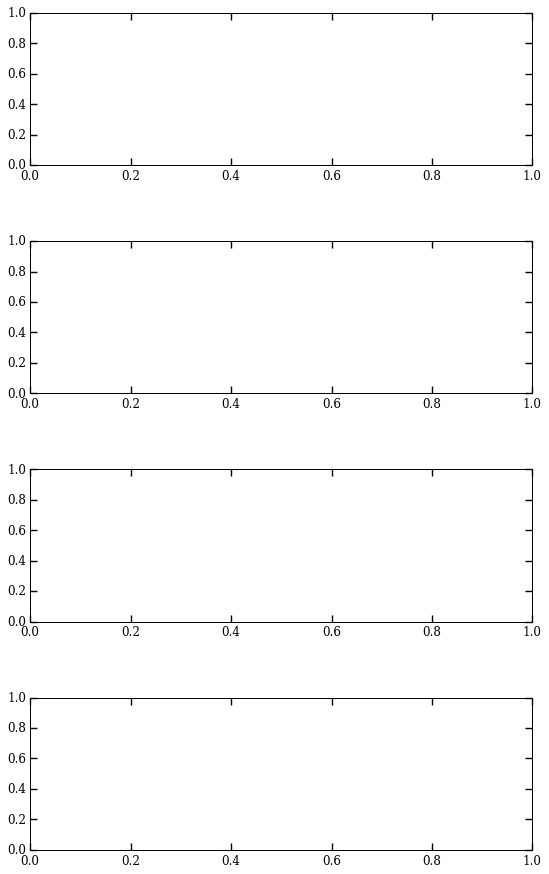

In [530]:
plt.figure(figsize=(18, 15))
gs = gridspec.GridSpec(4, 1)
gs.update(hspace=0.5, wspace=0.3)
gs.set_width_ratios([1., 1.])
# gs.set_height_ratios([1., 1.])

ax_lists = [[plt.subplot(gs[row, col]) for col in range(1)]
            for row in range(5)] 

offset_labels = ['BCG', 'centroid', 'shrinking aperture', 'KDE', 'no_peak']
title_on = False
for i, stat in enumerate(['BCG', u'centroid', u'shrink_cent', u'KDE', 'no_peak']):
    ax1 = ax_lists[i][0]
    sum_stat1 = plotCI.CI_loc_plot(np.array(sum_stat_dom_peak_df[stat]), ax=ax1)
    ax1.set_xlim(0, 400)
  
    ax1.set_ylabel('PDF')
    ax1.set_xlabel(offset_labels[i] + ' offset in kpc')
    if title_on:
        ax1.set_title(stat + 
                 " loc={0:.0f} $\pm$ {1:.0f}, {2:.0f}, {3:.0f}, {4:.0f}".format(
                 sum_stat1['loc'], sum_stat1['low68'], sum_stat1['up68'], 
                 sum_stat1['low95'], sum_stat1['up95'])
                )
    sum_stat_df_list.append(pd.DataFrame(sum_stat1, index=[stat]))
    
plt.savefig('../../paper/figures/finalized/Fig5_offset_distribution.png',
            bbox_inches='tight')

In [141]:
sum_stat_df = pd.concat(sum_stat_df_list)
abs_sum_stat_df = pd.concat(abs_sum_stat_df_list)

# comments 

for final results there will be several tables:
* 

In [151]:
sum_stat_df.to_hdf("../../data/test_sum_stat.h5", "df")

/Users/karenyng/Documents/illustris_analyses/code/IlEnv/lib/python2.7/site-packages/pandas/io/pytables.py:2558: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->axis1] [items->None]

  warnings.warn(ws, PerformanceWarning)


In [152]:
abs_sum_stat_df.to_hdf("../../data/test_sum_stat.h5", "abs_df")

In [150]:
sum_stat_df.ix['BCG', 'loc']

-0.92131372826162639

# call the python wrapper to R function 

see if the density estimates differ a lot between the one made by "Silverman's" rule and 
the cross validation 

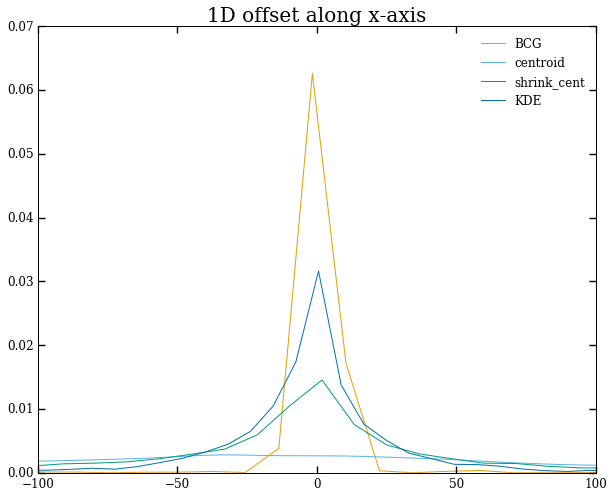

In [210]:

for stat in ['BCG', u'centroid', u'shrink_cent', u'KDE']:
    
    fhat = get_KDE.do_1D_KDE(np.array(dom_peak_df["Delta_x_" + stat]), 
                             convert_to_py_format=True)
    plt.plot(fhat['eval_points'], fhat['estimate'], label=stat)
   
plt.xlim(-100, 100)
plt.title('1D offset along x-axis')
plt.legend()

In [ ]:
color = {'BCG': 'r',
         'centroid': 'g',
         'shrink_cent': 'b',         
        }

In [252]:
no_dens_df.shape

(33024, 3)

In [267]:
dom_peak_df_25.index = no_dens_df.index

In [329]:
from collections import OrderedDict
key_mapping = OrderedDict([
 (u'BCG', r"$\Delta s_{\rm BCG}$"), 
 (u'Delta_x_BCG', r"$\Delta x_{\rm BCG}$"),
 (u'Delta_y_BCG', r"$\Delta y_{\rm BCG}$"), 
 (u'centroid', r"$\Delta s_{\rm centroid}$'"), 
 (u'Delta_x_centroid', r"$\Delta x_{\rm centroid}$'"), 
 (u'Delta_y_centroid', r"$\Delta y_{\rm centroid}$'"), 
 (u'shrink_cent', r"$\Delta s_{\rm shrink}$'"),
 (u'Delta_x_shrink_cent', r"$\Delta x_{\rm shrink}$'"), 
 (u'Delta_y_shrink_cent', r"$\Delta y_{\rm shrink}$'"),
 (u'KDE', r"$\Delta s_{\rm KDE}$'"), 
 (u'Delta_x_KDE', r"$\Delta x_{\rm KDE}$'"), 
 (u'Delta_y_KDE', r"$\Delta y_{\rm KDE}$'"), 
 (u'no_dens_dist', r"$\Delta s_{\rm num. KDE}$"),
 (u'Delta_no_peak_x', r"$\Delta x_{\rm num. KDE}$"), 
 (u'Delta_no_peak_y', r"$\Delta y_{\rm num. KDE}$"),
 ( u'total_peaks_dens', r"$\nu$")]
)

In [330]:
key_mapping.values()

['$\\Delta s_{\\rm BCG}$',
 '$\\Delta x_{\\rm BCG}$',
 '$\\Delta y_{\\rm BCG}$',
 "$\\Delta s_{\\rm centroid}$'",
 "$\\Delta x_{\\rm centroid}$'",
 "$\\Delta y_{\\rm centroid}$'",
 "$\\Delta s_{\\rm shrink}$'",
 "$\\Delta x_{\\rm shrink}$'",
 "$\\Delta y_{\\rm shrink}$'",
 "$\\Delta s_{\\rm KDE}$'",
 "$\\Delta x_{\\rm KDE}$'",
 "$\\Delta y_{\\rm KDE}$'",
 '$\\Delta s_{\\rm num. KDE}$',
 '$\\Delta x_{\\rm num. KDE}$',
 '$\\Delta y_{\\rm num. KDE}$',
 '$\\nu$']

In [336]:
sum_stat_all_peak_df = all_peak_df[key_mapping.keys()].describe()

In [337]:
sum_stat_all_peak_df.columns = key_mapping.values()

In [343]:
def str_formatter(float_str):
    return '{0:.0f}'.format(float_str)

In [344]:
with open("../../paper/full_sum_stat_table.tex", "w") as f:
    f.write(sum_stat_all_peak_df.transpose().to_latex(
            escape=False, float_format=str_formatter))

In [345]:
!cat ../../paper/full_sum_stat_table.tex

\begin{tabular}{lrrrrrrrr}
\toprule
{} &  count &  mean &  std &   min &  25% &  50% &  75% &  max \\
\midrule
$\Delta s_{\rm BCG}$       &  33024 &    69 &  294 &     0 &    2 &    3 &    7 & 2335 \\
$\Delta x_{\rm BCG}$       &  33024 &   -14 &  226 & -2331 &   -2 &   -0 &    1 & 2327 \\
$\Delta y_{\rm BCG}$       &  33024 &    23 &  197 & -1980 &   -2 &    0 &    2 & 2332 \\
$\Delta s_{\rm centroid}$' &  33024 &   261 &  209 &     2 &  114 &  202 &  317 & 1103 \\
$\Delta x_{\rm centroid}$' &  33024 &   -42 &  224 & -1022 & -164 &  -37 &   66 & 1101 \\
$\Delta y_{\rm centroid}$' &  33024 &     0 &  244 & -1102 & -111 &   -0 &  111 & 1100 \\
$\Delta s_{\rm shrink}$'   &  33024 &   118 &  156 &     0 &   21 &   60 &  165 & 1454 \\
$\Delta x_{\rm shrink}$'   &  33024 &    -7 &  131 & -1089 &  -39 &   -3 &   23 &  969 \\
$\Delta y_{\rm shrink}$'   &  33024 &     0 &  145 & -1091 &  -32 &    0 &   32 & 1109 \\

$\Delta x_{\rm KDE}$'      &  33024 &    -2 &   35 &  -330 &  -17 &   -2 &   1

In [312]:
original_keys = all_peak_df.keys()

In [313]:
all_peak_df.describe()

,BCG,Delta_x_BCG,Delta_x_centroid,Delta_x_shrink_cent,Delta_y_BCG,Delta_y_centroid,Delta_y_shrink_cent,centroid,shrink_cent,peak_id,KDE,Delta_x_KDE,Delta_y_KDE,total_peaks_dens,bin_width,Delta_no_peak_x,Delta_no_peak_y,no_dens_dist
count,33024.000000,33024.000000,33024.000000,33024.000000,33024.000000,33024.000000,33024.000000,33024.000000,33024.000000,33024,33024.000000,33024.000000,33024.000000,33024.000000,33024,33024.000000,33024.000000,33024.000000
mean,69.010439,-13.803262,-42.009893,-6.643864,22.967323,0.015059,0.062046,261.043833,118.184369,0,37.260922,-2.188538,-0.016623,1.375895,25,-12.310714,-0.067723,136.105720
std,293.618170,226.403827,224.346732,131.033418,197.477776,244.008510,144.959161,208.543876,155.753308,0,34.826452,34.756433,37.262587,0.420166,0,141.736353,155.189352,160.621181
min,0.015291,-2331.323053,-1021.762137,-1089.260820,-1979.971248,-1102.390879,-1090.763045,2.433943,0.080020,0,0.030510,-330.067743,-438.606614,1.000000,25,-1967.406601,-1415.458204,0.539944
25%,1.563436,-1.953650,-164.459451,-38.794019,-1.621200,-111.284399,-32.168332,114.428948,20.873355,0,14.454694,-17.268149,-15.158321,1.070827,25,-54.584929,-53.950053,56.231407
50%,2.873053,-0.210335,-36.553481,-2.594651,0.077370,-0.099805,0.019156,201.573508,60.303767,0,26.179716,-2.360577,0.031590,1.251899,25,-4.337078,-0.030180,91.694849
75%,6.505957,1.433943,66.443211,23.206525,1.854240,111.298722,32.098692,317.362826,165.177522,0,48.745643,12.066535,15.152376,1.526079,25,52.523578,53.756090,147.251373
max,2335.025509,2326.801110,1101.390605,968.697331,2331.603636,1100.052472,1109.350270,1102.852008,1453.928418,0,497.903022,385.528956,440.043008,5.325824,25,993.436210,1416.894602,2126.376861


In [ ]:
all_peak_df.to_la

Delta_x_BCG
{'loc': -0.12904369862096723,
 'low68': -3.5052957380030421,
 'low95': -311.59998152944536,
 'low99': -1442.2285526740843,
 'up68': 2.5385649341114913,
 'up95': 19.248062086428035,
 'up99': 1292.7961620657775}
Delta_x_shrink_cent
{'loc': -4.1814175068516297,
 'low68': -76.808971653069193,
 'low95': -267.83630666739714,
 'low99': -593.21709021925062,
 'up68': 54.484469515630281,
 'up95': 277.41875636532313,
 'up99': 533.63062335100085}
Delta_x_KDE
{'loc': -2.7003418903231573,
 'low68': -27.499338542917883,
 'low95': -72.617072531162364,
 'low99': -120.01910769688033,
 'up68': 21.09499040811545,
 'up95': 74.347065174680154,
 'up99': 129.6494395346844}
Delta_no_peak_x
{'loc': -0.97733373479515429,
 'low68': -87.026240561098348,
 'low95': -332.13937611166739,
 'low99': -802.81731120060999,
 'up68': 80.951460889582904,
 'up95': 198.28747304749277,
 'up99': 423.11633523011278}


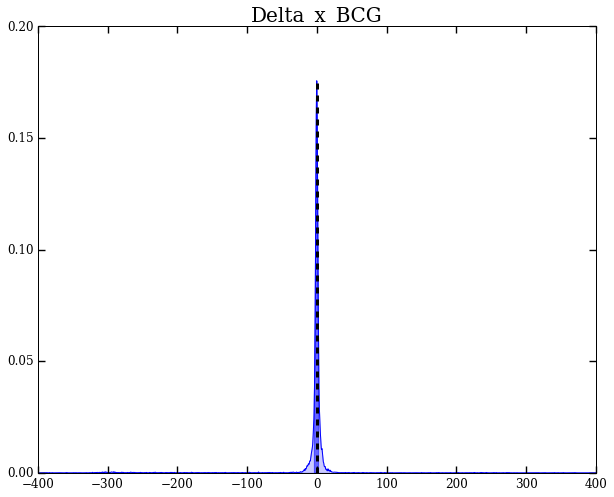

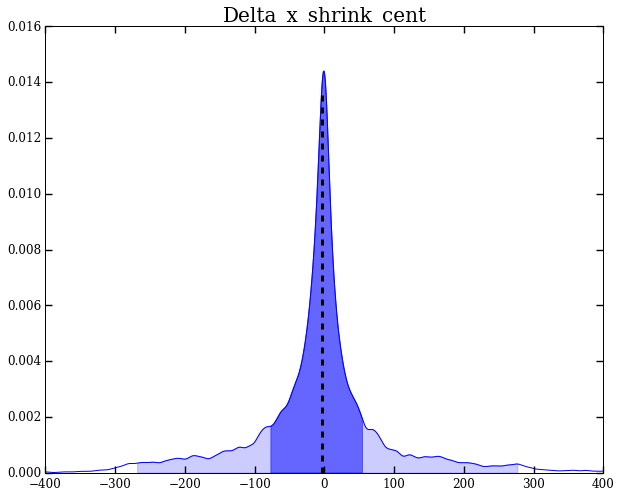

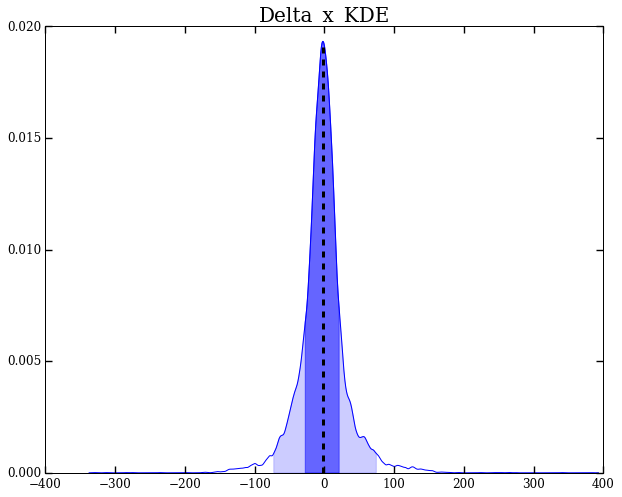

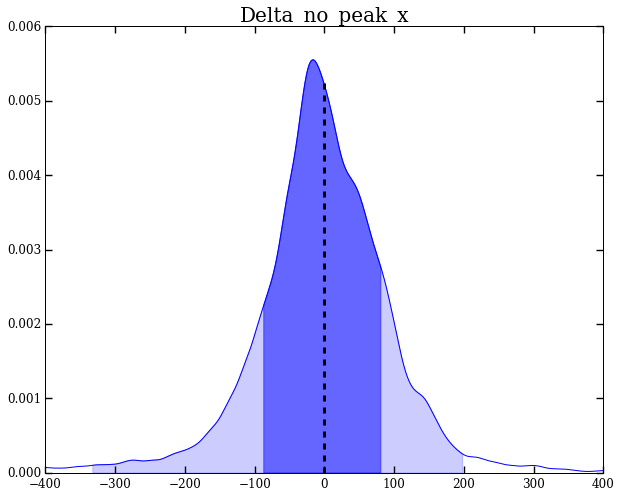

In [531]:
lvl = [68., 95., 99.]
for stat in ['Delta_x_BCG', 
             'Delta_x_shrink_cent', 
             'Delta_x_KDE', 
             'Delta_no_peak_x']:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    sum_stat = plotCI.CI_loc_plot(np.array(all_peak_df[ stat]), ax,
                       lvls=lvl)
    print(stat)
    pprint.pprint(sum_stat)
    ax.set_xlim(-400, 400)
    ax.set_title(stat)

Delta_y_BCG
{'loc': 0.024692769214041919,
 'low68': -2.7779909606429101,
 'low95': -22.193979371357045,
 'low99': -495.61501204344904,
 'up68': 3.2771647471054166,
 'up95': 455.96587081114671,
 'up99': 1448.7481392423767}
Delta_y_shrink_cent
{'loc': -0.0091952291322757243,
 'low68': -65.420295931196279,
 'low95': -294.51796891507308,
 'low99': -651.6868953065291,
 'up68': 65.409939265216281,
 'up95': 294.9504117954491,
 'up99': 655.49142703992379}
Delta_y_KDE
{'loc': 0.0007042265993289186,
 'low68': -25.392521767570031,
 'low95': -78.718670137218453,
 'low99': -126.64401166431418,
 'up68': 25.396883994212715,
 'up95': 78.62756355603824,
 'up99': 125.96645383507905}
Delta_no_peak_y
{'loc': -0.029626445967822889,
 'low68': -83.640437758305552,
 'low95': -302.60736196858261,
 'low99': -693.24224083929028,
 'up68': 83.579476004048047,
 'up95': 302.23812015208227,
 'up99': 690.8471586137648}


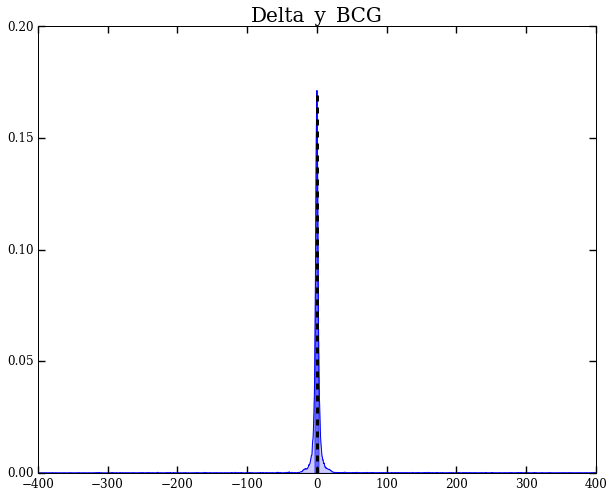

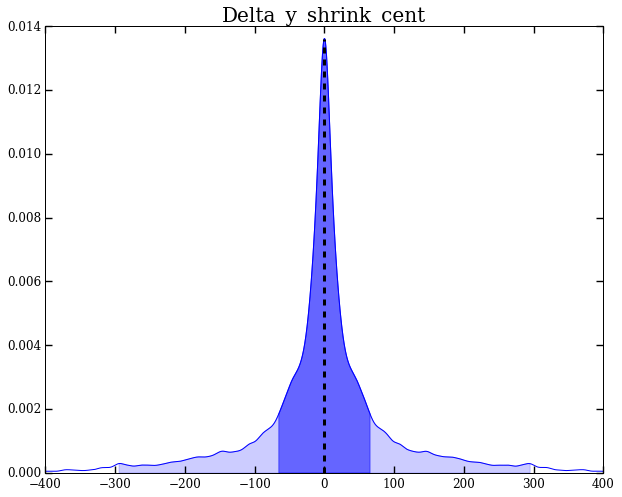

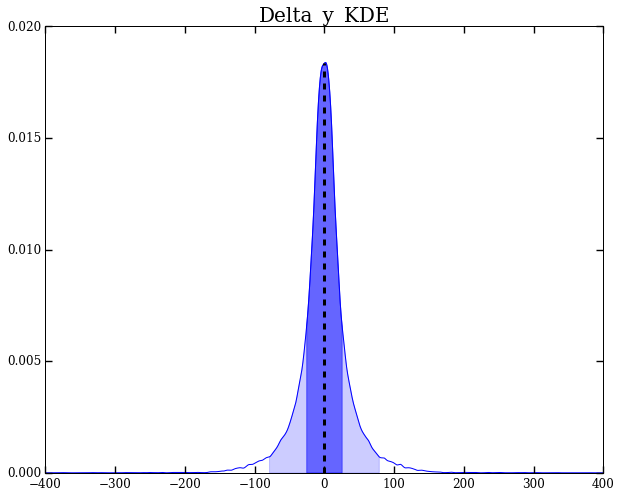

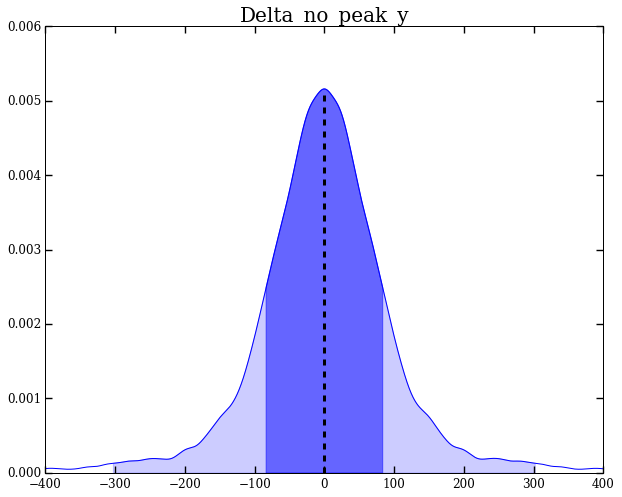

In [510]:
lvl = [68., 95., 99.]
for stat in ['Delta_y_BCG', 
             'Delta_y_shrink_cent', 
             'Delta_y_KDE', 
             'Delta_no_peak_y']:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    sum_stat = plotCI.CI_loc_plot(np.array(all_peak_df[ stat]), ax,
                       lvls=lvl)
    print(stat)
    pprint.pprint(sum_stat)
    ax.set_xlim(-400, 400)
    ax.set_title(stat)

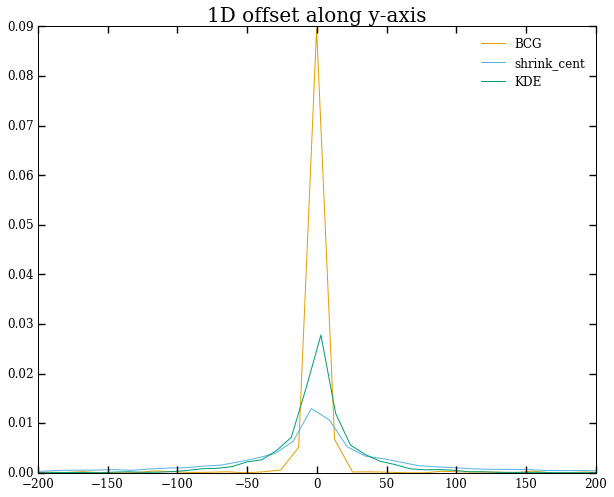

In [202]:
for stat in ['BCG', u'shrink_cent', u'KDE']:
    fhat = get_KDE.do_1D_KDE(np.array(dom_peak_df["Delta_y_" + stat]), 
                             convert_to_py_format=True)
    plt.plot(fhat['eval_points'], fhat['estimate'], label=stat)
   
plt.xlim(-200, 200)
plt.title('1D offset along y-axis')
plt.legend()

# gather the projection independent part of our uber dataframe

In [36]:
uber_df = compDist.construct_uber_result_df(
    star_fhats, DM_fhats, main_FOF_h5
)

In [37]:
uber_df

,clstNo,M200C,richness
0,48,1168.006836,53
1,51,1878.831665,56
2,58,1416.312622,58
